# Exploratory data analysis (EDA)


Exploratory Data Analysis (EDA) plays a very important role in understanding the dataset. Whether you are going to build a Machine Learning Model or if it's just an exercise to bring out insights from the given data, EDA is the primary task to perform. While it's undeniable that EDA is very important, The task of performing Exploratory Data Analysis grows in parallel with the number of columns your dataset has got.

This is a generic exploratory data analysis notebook which will serve as a guideline in your future data exploration endeavours. You can always build on this and add more analysis/graphs according to your dataset/requirements.

- Basic Data Summary
- Missing Values Analysis
- Data Distribution Analysis
- Correlation Analysis
- Visualization of high dimentional data

# Prerequisites

For prerequisites we import the necessary libraries and load the files needed for our EDA

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

Loading dataset in a data frame and printing top 5 rows to visualize attributes

This is a house sale price data set with **`81`** columns and **`1460`** records with **`SalePrice (Continuous)`** as the class label

In [30]:
df = pd.read_csv(r'C:\Users\Saif\Desktop\ProHack Competition\train.csv', na_values=['NaN'])
df.head()

galactic year                        galaxy  existence expectancy index  \
0         990025  Large Magellanic Cloud (LMC)                    0.628657   
1         990025              Camelopardalis B                    0.818082   
2         990025                       Virgo I                    0.659443   
3         990025            UGC 8651 (DDO 181)                    0.555862   
4         990025                  Tucana Dwarf                    0.991196   

   existence expectancy at birth  Gross income per capita  Income Index  \
0                      63.125200             27109.234310      0.646039   
1                      81.004994             30166.793958      0.852246   
2                      59.570534              8441.707353      0.499762   
3                      52.333293                      NaN           NaN   
4                      81.802464             81033.956906      1.131163   

   Expected years of education (galactic years)  \
0                                      8.240543   
1                                     10.671823   
2                                      8.840316   
3                                           NaN   
4                                     13.800672   

   Mean years of education (galactic years)  \
0                                       NaN   
1                                  4.742470   
2                                  5.583973   
3                                       NaN   
4                                 13.188907   

   Intergalactic Development Index (IDI)  Education Index  ...  \
0                                    NaN              NaN  ...   
1                               0.833624         0.467873  ...   
2                               0.469110         0.363837  ...   
3                                    NaN              NaN  ...   
4                               0.910341         0.918353  ...   

   Intergalactic Development Index (IDI), female  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   

   Intergalactic Development Index (IDI), male  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   

   Gender Development Index (GDI)  \
0                             NaN   
1                             NaN   
2                             NaN   
3                             NaN   
4                             NaN   

   Intergalactic Development Index (IDI), female, Rank  \
0                                                NaN     
1                                                NaN     
2                                                NaN     
3                                                NaN     
4                                                NaN     

   Intergalactic Development Index (IDI), male, Rank  Adjusted net savings   \
0                                                NaN                    NaN   
1                                                NaN              19.177926   
2                                                NaN              21.151265   
3                                                NaN                    NaN   
4                                                NaN                    NaN   

   Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total  \
0                                                NaN                           
1                                                NaN                           
2                                           6.534020                           
3                                           5.912194                           
4                                  

# Data Summary/Statistics

**`Pandas.info()`** Shows # of rows, # of columns, non-null values and data type for each column, unique data types in the dataset with their numbers and memory occupied by the data frame

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 80 columns):
galactic year                                                                              3865 non-null int64
galaxy                                                                                     3865 non-null object
existence expectancy index                                                                 3864 non-null float64
existence expectancy at birth                                                              3864 non-null float64
Gross income per capita                                                                    3837 non-null float64
Income Index                                                                               3837 non-null float64
Expected years of education (galactic years)                                               3732 non-null float64
Mean years of education (galactic years)                                                   3502 non-null 

**`Pandas.describe()`** shows summary statistics for numerical data in the dataframe. In other  words this shows the five number summary for each data variable

In [12]:
df.describe()

galactic year  existence expectancy index  \
count   3.865000e+03                 3864.000000   
mean    1.000709e+06                    0.872479   
std     6.945463e+03                    0.162367   
min     9.900250e+05                    0.227890   
25%     9.950060e+05                    0.763027   
50%     1.000000e+06                    0.907359   
75%     1.006009e+06                    0.992760   
max     1.015056e+06                    1.246908   

       existence expectancy at birth  Gross income per capita  Income Index  \
count                    3864.000000              3837.000000   3837.000000   
mean                       76.798111             31633.240872      0.825154   
std                        10.461654             18736.378445      0.194055   
min                        34.244062              -126.906522      0.292001   
25%                        69.961449             20169.118912      0.677131   
50%                        78.995101             26600.768195      0.827300   
75%                        84.558971             36898.631754      0.970295   
max                       100.210053            151072.683156      1.361883   

       Expected years of education (galactic years)  \
count                                   3732.000000   
mean                                      14.723296   
std                                        3.612546   
min                                        3.799663   
25%                                       12.592467   
50%                                       14.942913   
75%                                       17.123797   
max                                       26.955944   

       Mean years of education (galactic years)  \
count                               3502.000000   
mean                                  10.283959   
std                                    3.319948   
min                                    1.928166   
25%                                    7.654169   
50%                                   10.385465   
75%                                   12.884752   
max                                   19.057648   

       Intergalactic Development Index (IDI)  Education Index  \
count                            3474.000000      3474.000000   
mean                                0.804246         0.745900   
std                                 0.176242         0.199795   
min                                 0.273684         0.189874   
25%                                 0.671862         0.597746   
50%                                 0.824758         0.761255   
75%                                 0.939043         0.893505   
max                                 1.232814         1.269625   

       Intergalactic Development Index (IDI), Rank  ...  \
count                                  3432.000000  ...   
mean                                    135.129178  ...   
std                                      52.449535  ...   
min                                       9.925906  ...   
25%                                      92.262724  ...   
50%                                     135.914318  ...   
75%                                     175.301993  ...   
max                                     278.786613  ...   

       Intergalactic Development Index (IDI), female  \
count                                     916.000000   
mean                                        0.823561   
std                                         0.185780   
min                                         0.305733   
25%                                         0.690707   
50%                                         0.835410   
75%                                         0.970365   
max                                         1.237661   

       Intergalactic Development Index (IDI), male  \
count                                   915.000000   
mean                                      0.844209   
std                                       0.159041   
min                            

In [13]:
#show the stats in tabular form 
df.describe().T

count          mean  \
galactic year                                       3865.0  1.000709e+06   
existence expectancy index                          3864.0  8.724787e-01   
existence expectancy at birth                       3864.0  7.679811e+01   
Gross income per capita                             3837.0  3.163324e+04   
Income Index                                        3837.0  8.251535e-01   
...                                                    ...           ...   
Adjusted net savings                                 912.0  2.125292e+01   
Creature Immunodeficiency Disease prevalence, a...   941.0  6.443023e+00   
Private galaxy capital flows (% of GGP)              874.0  2.226147e+01   
Gender Inequality Index (GII)                        844.0  6.007333e-01   
y                                                   3865.0  8.277313e-02   

                                                             std  \
galactic year                                        6945.463143   
existence expectancy index                              0.162367   
existence expectancy at birth                          10.461654   
Gross income per capita                             18736.378445   
Income Index                                            0.194055   
...                                                          ...   
Adjusted net savings                                   14.258986   
Creature Immunodeficiency Disease prevalence, a...      4.804873   
Private galaxy capital flows (% of GGP)                34.342797   
Gender Inequality Index (GII)                           0.205785   
y                                                       0.063415   

                                                              min  \
galactic year                                       990025.000000   
existence expectancy index                               0.227890   
existence expectancy at birth                           34.244062   
Gross income per capita                               -126.906522   
Income Index                                             0.292001   
...                                                           ...   
Adjusted net savings                                   -76.741414   
Creature Immunodeficiency Disease prevalence, a...      -1.192011   
Private galaxy capital flows (% of GGP)               -735.186886   
Gender Inequality Index (GII)                            0.089092   
y                                                        0.013036   

                                                              25%  \
galactic year                                       995006.000000   
existence expectancy index                               0.763027   
existence expectancy at birth                           69.961449   
Gross income per capita                              20169.118912   
Income Index                                             0.677131   
...                                                           ...   
Adjusted net savings                                    15.001028   
Creature Immunodeficiency Disease prevalence, a...       4.113472   
Private galaxy capital flows (% of GGP)                 17.227899   
Gender Inequality Index (GII)                            0.430332   
y                                                        0.047889   

                                                               50%  \
galactic year                                       1000000.000000   
existence expectancy index                                0.907359   
existence expectancy at birth                            78.995101   
Gross income per capita                               26600.768195   
Income Index                                              0.827300   
...                                                            ...   
Adjusted net savings                                     22.182571   
Creature Immunodeficiency Disease prevalence, a...        5.309497   
Private galaxy capital flows (% of 

**`Pandas.describe()`** for **`object(categorical)`** variables in dataframe

In [14]:
df.describe(include=['object']).T

count unique           top freq
galaxy  3865    181  Tucana Dwarf   26

# Missing Value Analysis

c:\users\saif\anaconda3\envs\prohack\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\saif\anaconda3\envs\prohack\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


<BarContainer object of 77 artists>

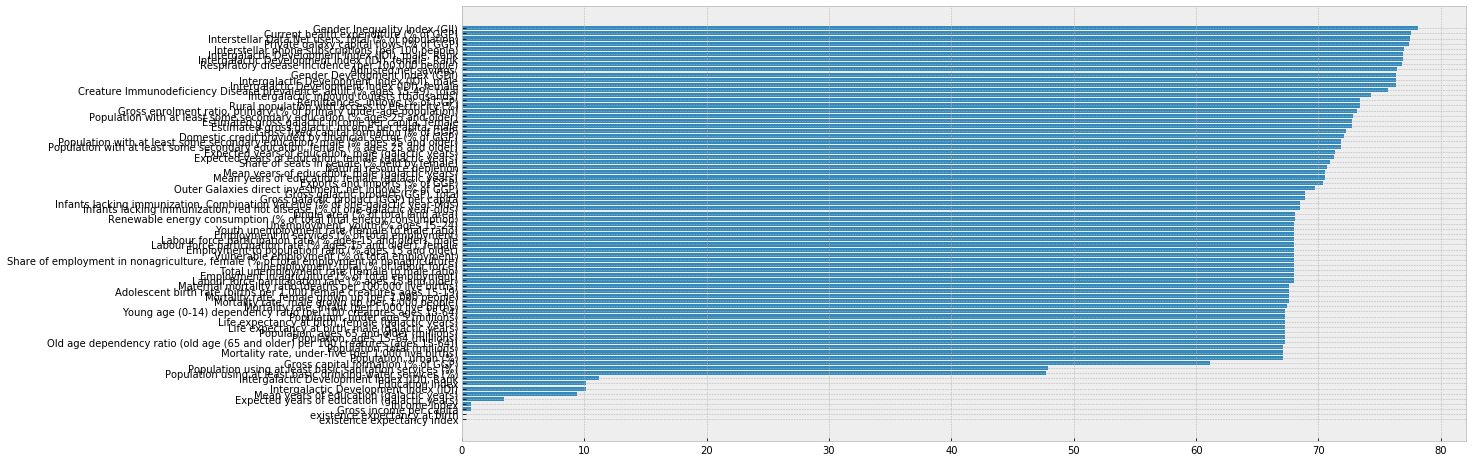

In [15]:


#columns_with_missing_values contains missing values column name along with missing value percentage
columns_with_missing_values=pd.DataFrame()

columns_with_missing_values['columns_name']=df.columns
columns_with_missing_values["missing_value"]=0

for i in columns_with_missing_values['columns_name']:
    columns_with_missing_values["missing_value"][columns_with_missing_values['columns_name']==i]=df[i].isnull().sum()/len(df[i])*100

columns_with_missing_values=columns_with_missing_values.sort_values('missing_value',ascending=True)[columns_with_missing_values['missing_value']!=0.0]


#resetting index
columns_with_missing_values=columns_with_missing_values.reset_index(drop=True)

#plotting column name along with missing percentage
plt.figure(figsize=(18, 8))
plt.barh(columns_with_missing_values['columns_name'],columns_with_missing_values['missing_value'])

Getting rid of features with more than **`70%`** missing values + removing **`ID`** column

In [31]:
'''
Pandas.count() does not include NaN values
'''

#identify columns with more than 25% of the values 

df2 = df[[column for column in df if df[column].count() / len(df) >= 0.25]]

'''
Deleting ID column
'''
# del df2['Id']

'''
Printing list of dropped columns
'''
print("List of dropped columns:", end=" ")
for c in df.columns:
    if c not in df2.columns:
        print(c, end=", ")
print('\n')
df = df2

List of dropped columns: Respiratory disease incidence (per 100,000 people), Interstellar phone subscriptions (per 100 people), Interstellar Data Net users, total (% of population), Current health expenditure (% of GGP), Intergalactic Development Index (IDI), female, Intergalactic Development Index (IDI), male, Gender Development Index (GDI), Intergalactic Development Index (IDI), female, Rank, Intergalactic Development Index (IDI), male, Rank, Adjusted net savings , Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total, Private galaxy capital flows (% of GGP), Gender Inequality Index (GII), 



# Data Distribution

Distribution of class label

count    3865.000000
mean        0.082773
std         0.063415
min         0.013036
25%         0.047889
50%         0.057820
75%         0.087389
max         0.683813
Name: y, dtype: float64


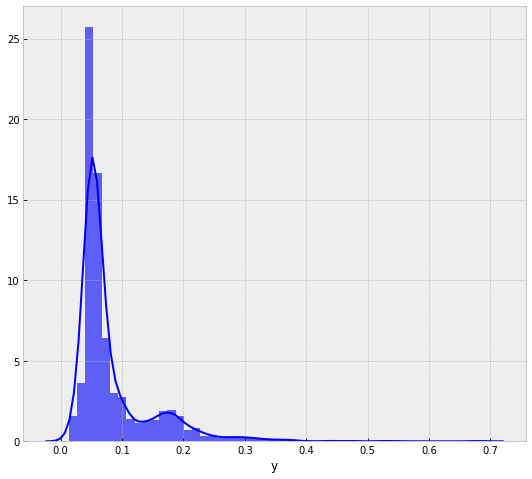

In [32]:
print(df['y'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['y'], color='b', bins=50, hist_kws={'alpha': 0.6});

Distributions of other numerical variables

In [33]:
list(set(df.dtypes.tolist()))

[dtype('int64'), dtype('float64'), dtype('O')]

In [34]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

galactic year  existence expectancy index  existence expectancy at birth  \
0         990025                    0.628657                      63.125200   
1         990025                    0.818082                      81.004994   
2         990025                    0.659443                      59.570534   
3         990025                    0.555862                      52.333293   
4         990025                    0.991196                      81.802464   

   Gross income per capita  Income Index  \
0             27109.234310      0.646039   
1             30166.793958      0.852246   
2              8441.707353      0.499762   
3                      NaN           NaN   
4             81033.956906      1.131163   

   Expected years of education (galactic years)  \
0                                      8.240543   
1                                     10.671823   
2                                      8.840316   
3                                           NaN   
4                                     13.800672   

   Mean years of education (galactic years)  \
0                                       NaN   
1                                  4.742470   
2                                  5.583973   
3                                       NaN   
4                                 13.188907   

   Intergalactic Development Index (IDI)  Education Index  \
0                                    NaN              NaN   
1                               0.833624         0.467873   
2                               0.469110         0.363837   
3                                    NaN              NaN   
4                               0.910341         0.918353   

   Intergalactic Development Index (IDI), Rank  ...  \
0                                          NaN  ...   
1                                   152.522198  ...   
2                                   209.813266  ...   
3                                          NaN  ...   
4                                    71.885345  ...   

   Rural population with access to electricity (%)  \
0                                              NaN   
1                                              NaN   
2                                              NaN   
3                                              NaN   
4                                       134.967049   

   Domestic credit provided by financial sector (% of GGP)  \
0                                          75.604799         
1                                          57.214150         
2                                          76.141735         
3                                                NaN         
4                                                NaN         

   Population with at least some secondary education, female (% ages 25 and older)  \
0                                                NaN                                 
1                                          57.314932                                 
2                                          42.405827                                 
3                                                NaN                                 
4                                          77.223935                                 

   Population with at least some secondary education, male (% ages 25 and older)  \
0                                                NaN                               
1                                          56.187355                               
2                                          53.927715                               
3                                                NaN                               
4                                          75.475076                               

   Gross fixed capital formation (% of GGP)  Remittances, inflows (% of GGP)  \
0                                 42.616284                              NaN   
1                                 29.908422                         6.225946   
2              

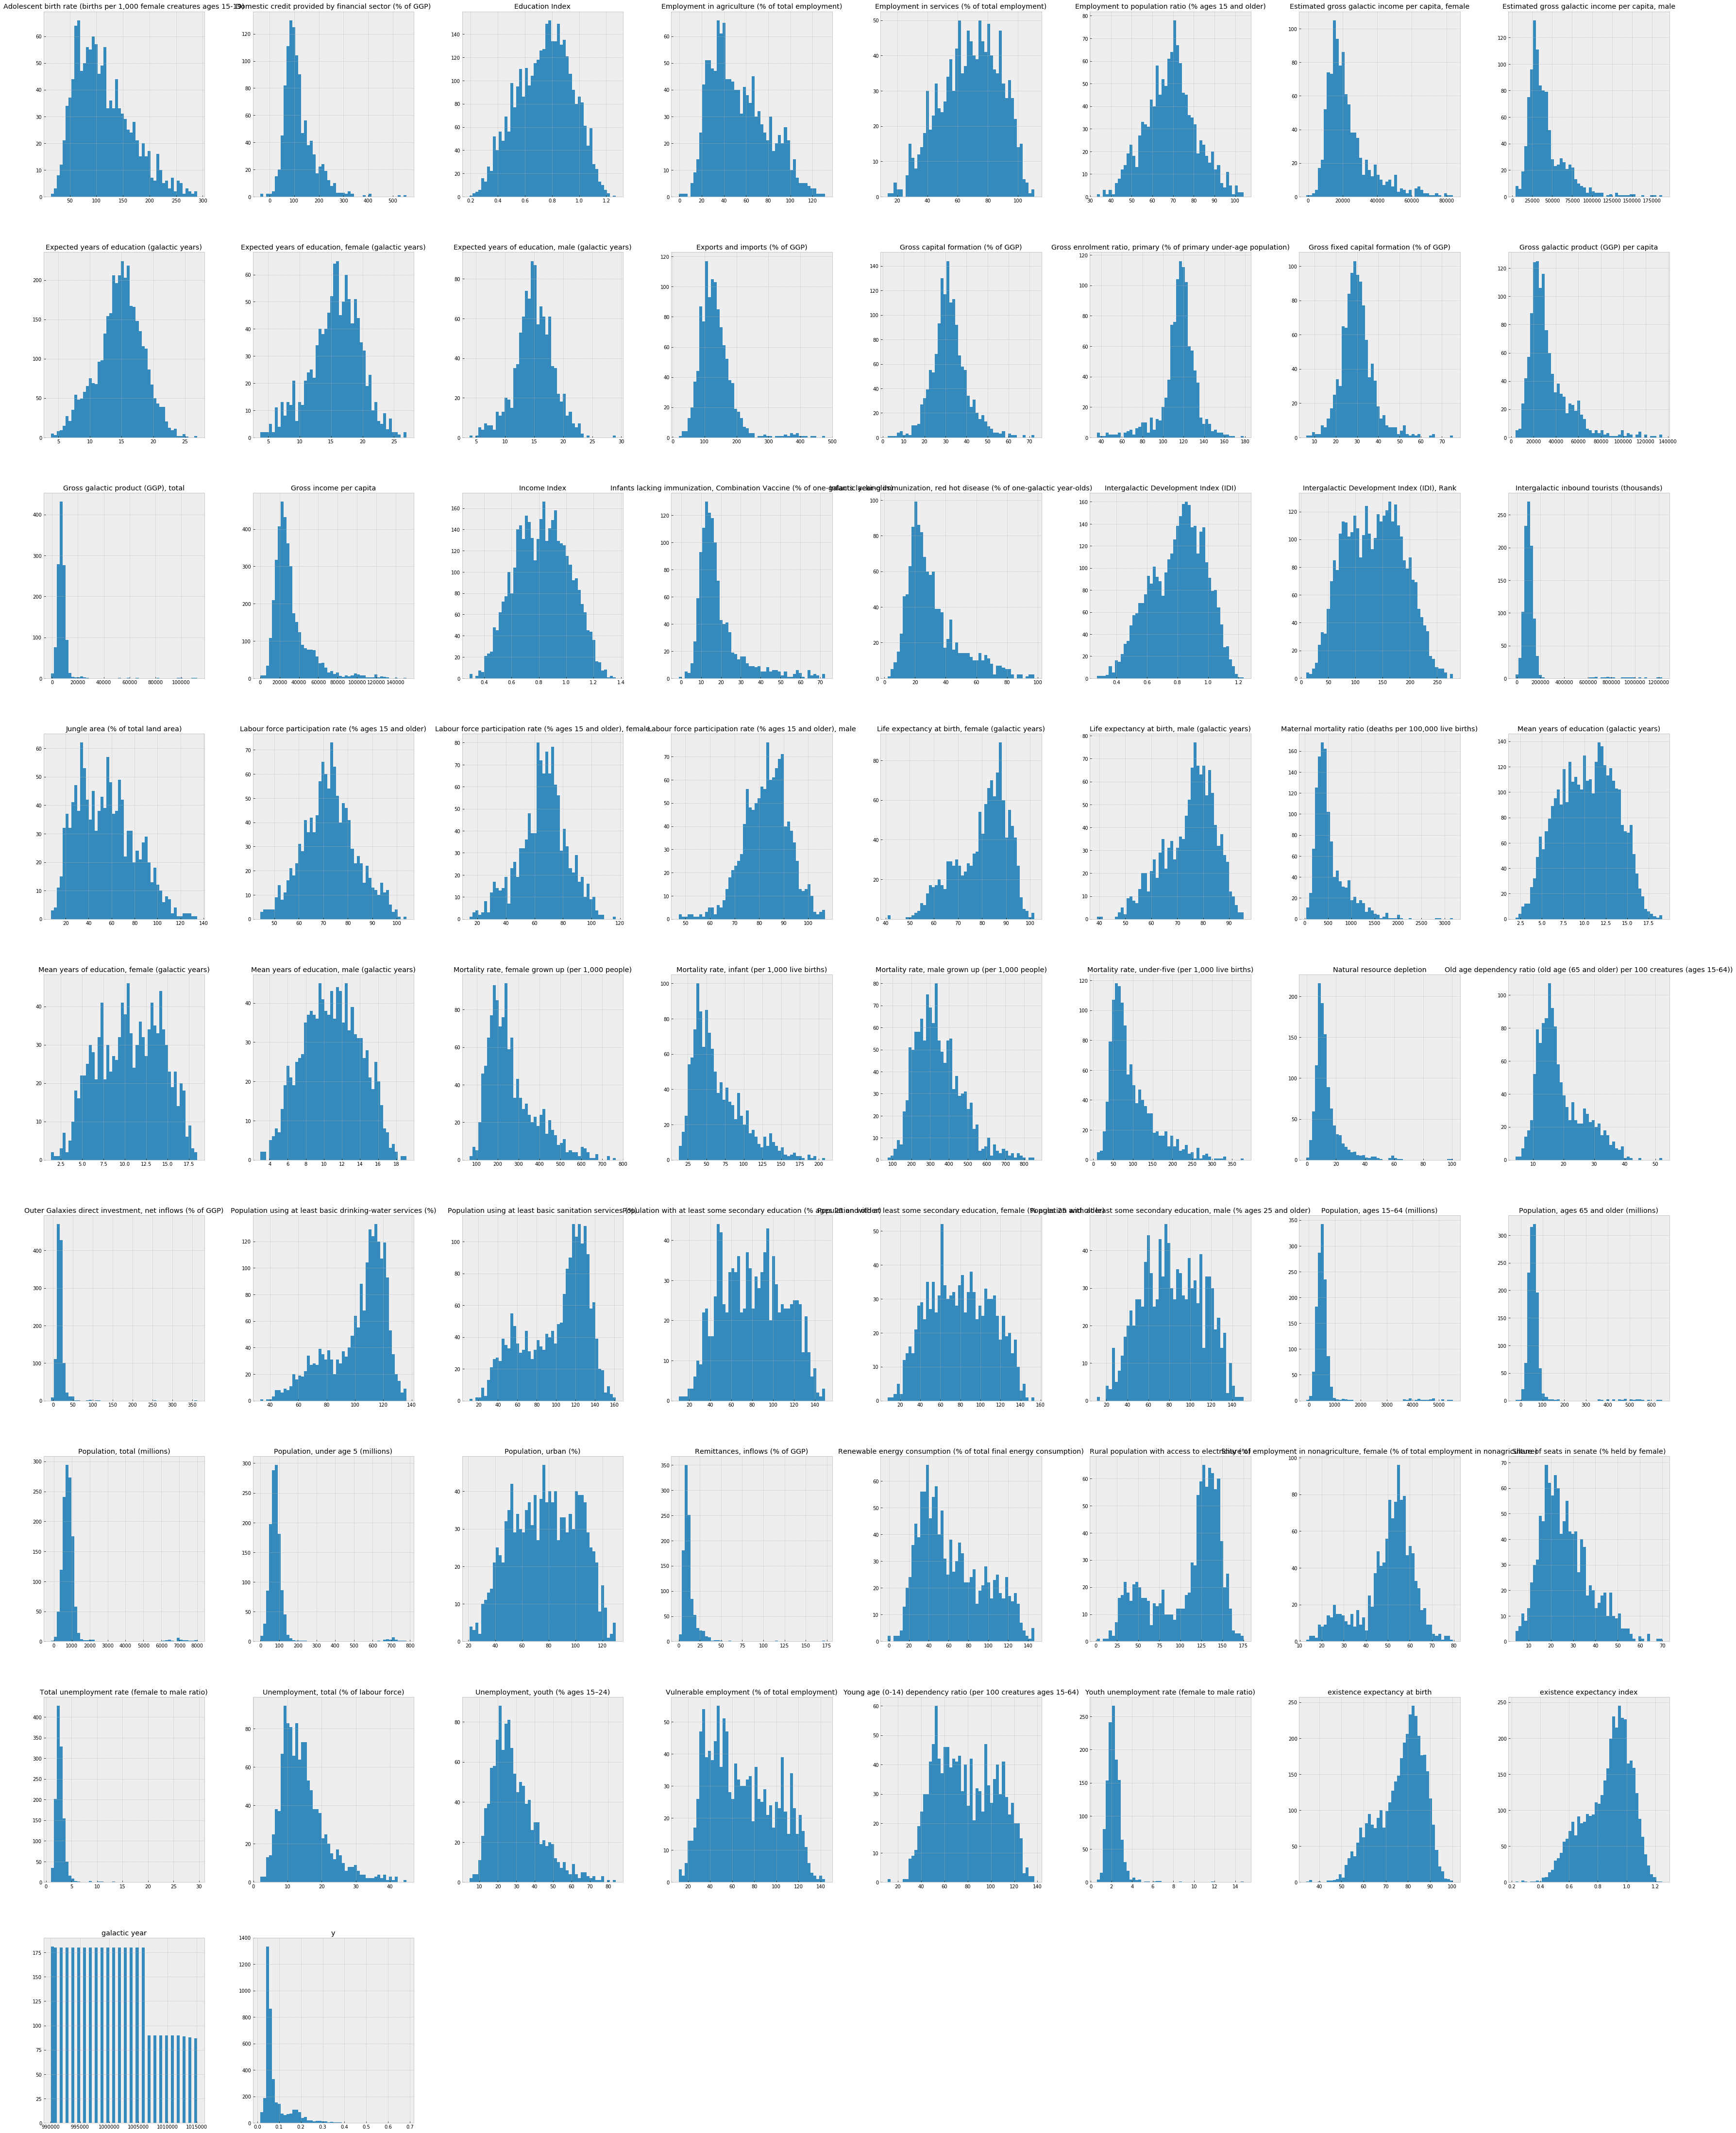

In [41]:
df_num.hist(figsize=(60, 80), bins=50, xlabelsize=10, ylabelsize=10); 

# Correlation Analysis

We find correlation of **`numerical attributes`** with class label **`y`** displayed in descending order of their correlations

In [36]:
df_num_corr = df_num.corr()['y'][:-1]
golden_features_list = df_num_corr.sort_values(ascending=False)
print(golden_features_list)

Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))    0.679981
Estimated gross galactic income per capita, female                                  0.667465
Intergalactic Development Index (IDI)                                               0.625114
Education Index                                                                     0.613938
Expected years of education (galactic years)                                        0.584069
                                                                                      ...   
Employment in agriculture (% of total employment)                                  -0.473959
Adolescent birth rate (births per 1,000 female creatures ages 15-19)               -0.491689
Vulnerable employment (% of total employment)                                      -0.496568
Young age (0-14) dependency ratio (per 100 creatures ages 15-64)                   -0.533741
Intergalactic Development Index (IDI), Rank                           

Correlation Heat Map

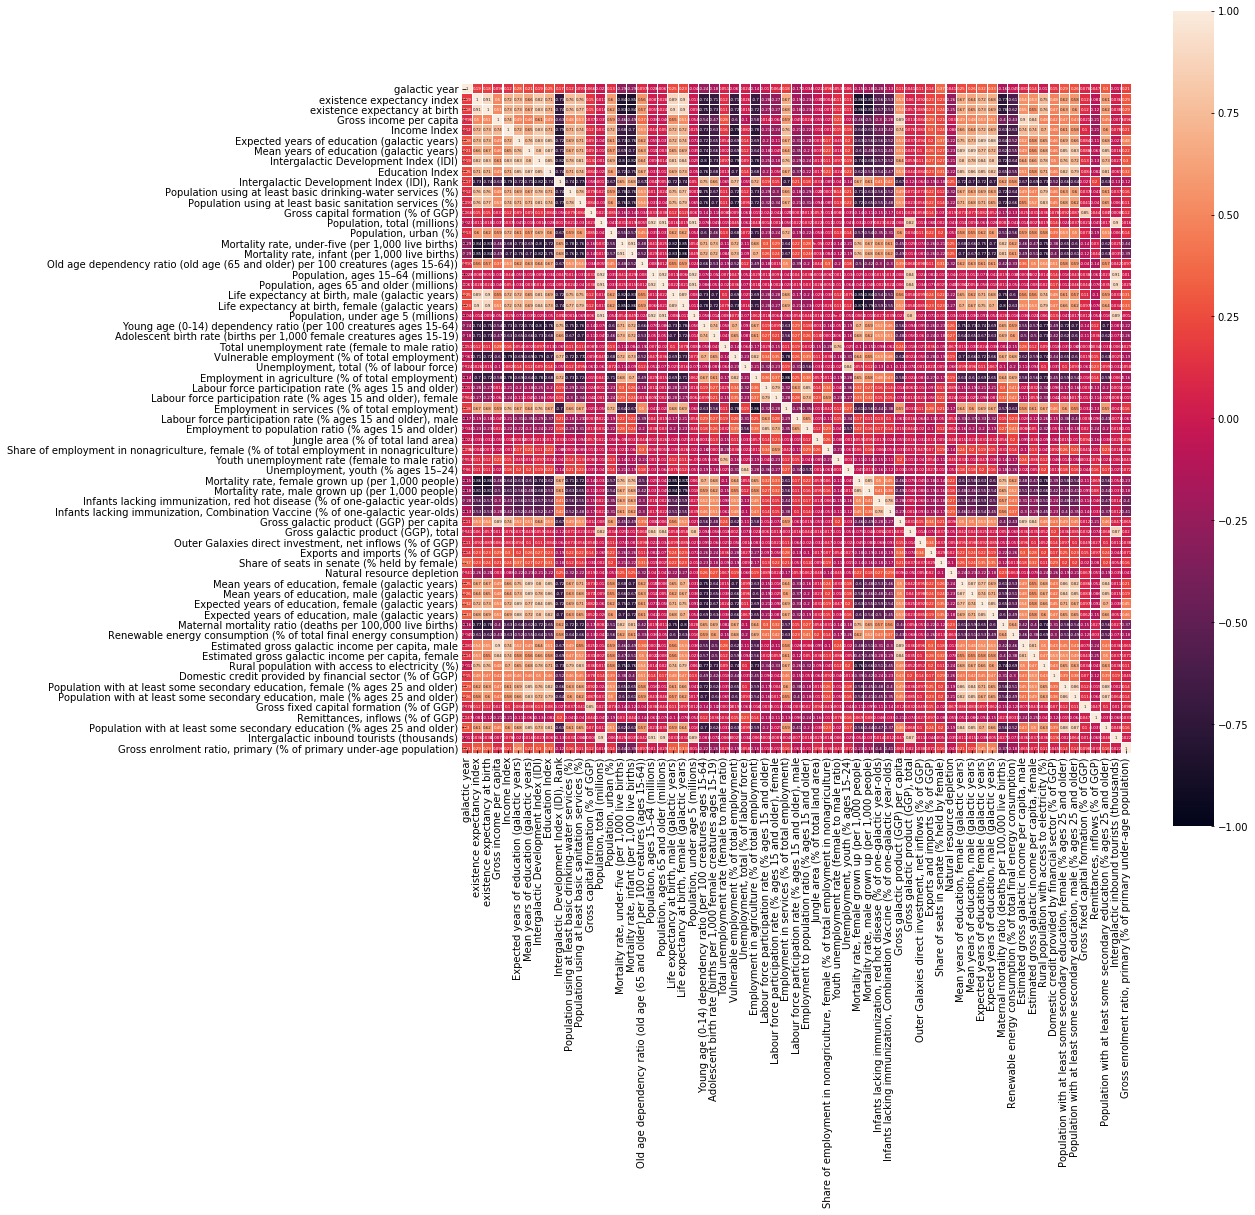

In [37]:
corr = df_num.drop('y', axis=1).corr() # We already examined class label y correlations
plt.figure(figsize=(15, 15))

sns.heatmap(corr, vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 4}, square=True);

# Data Distributions

Feature distributions with respect to class label

c:\users\saif\anaconda3\envs\prohack\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


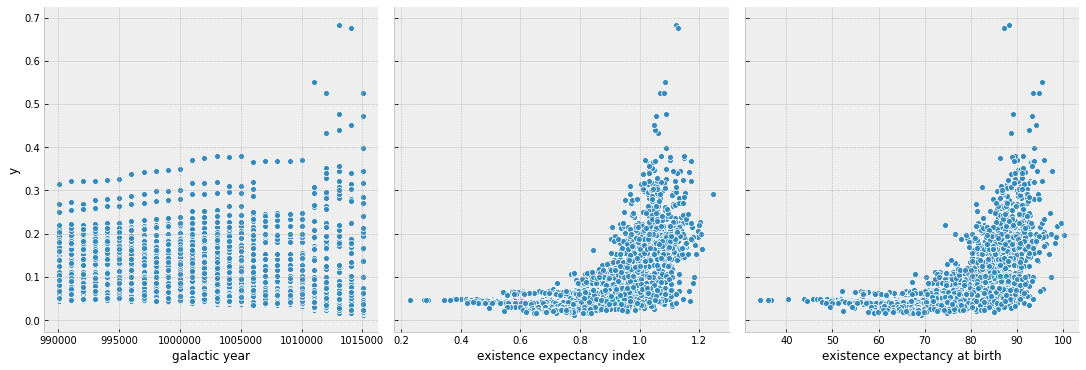

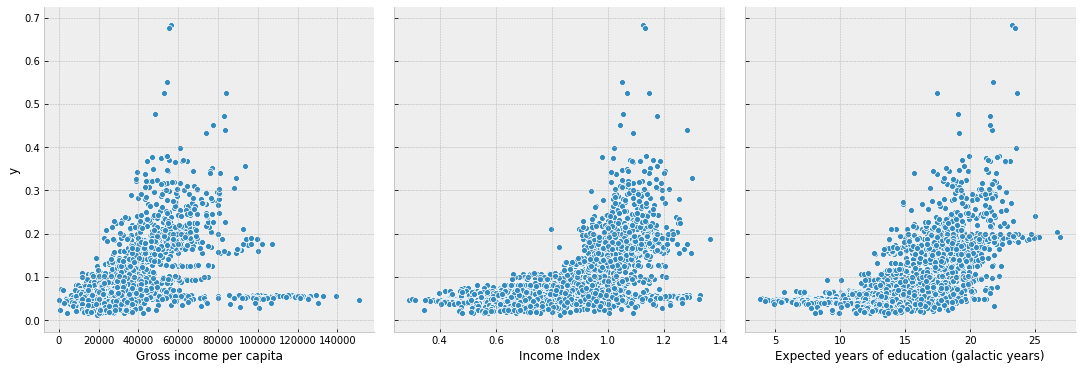

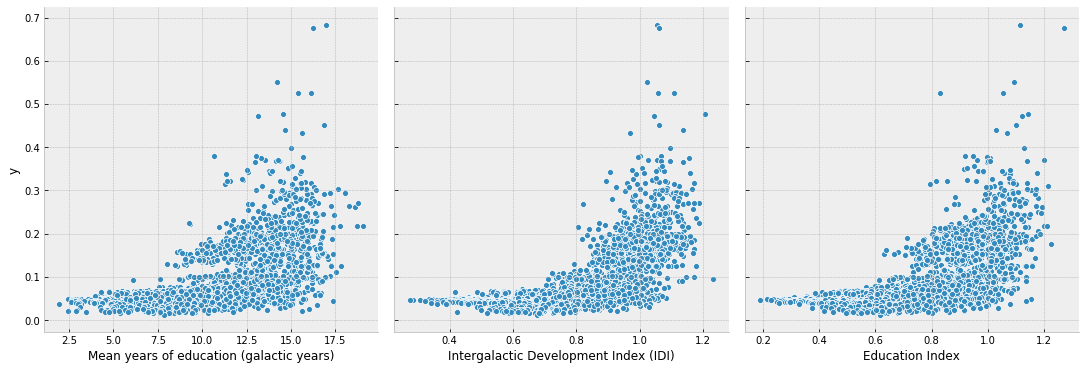

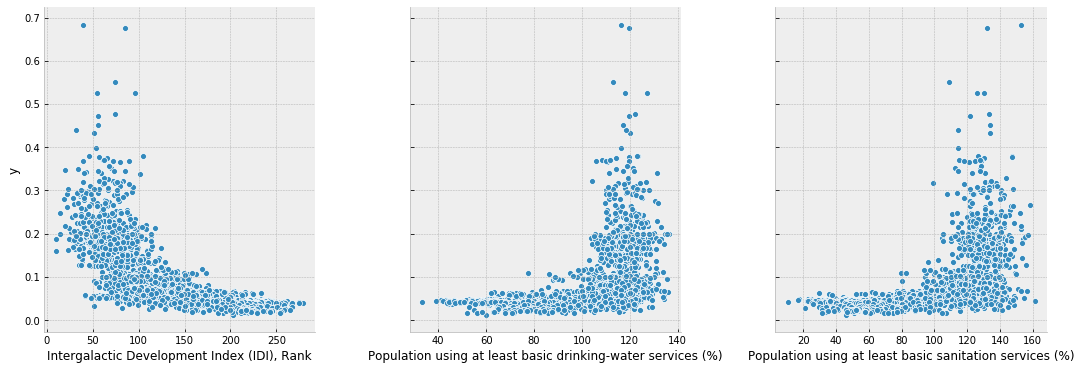

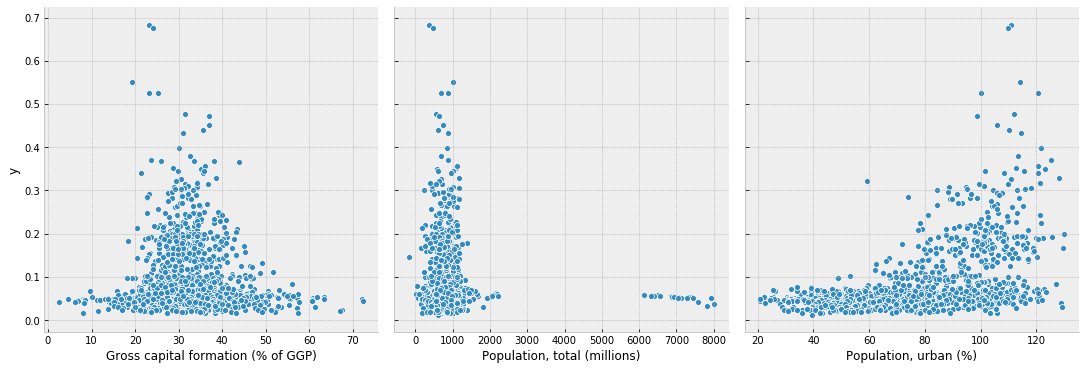

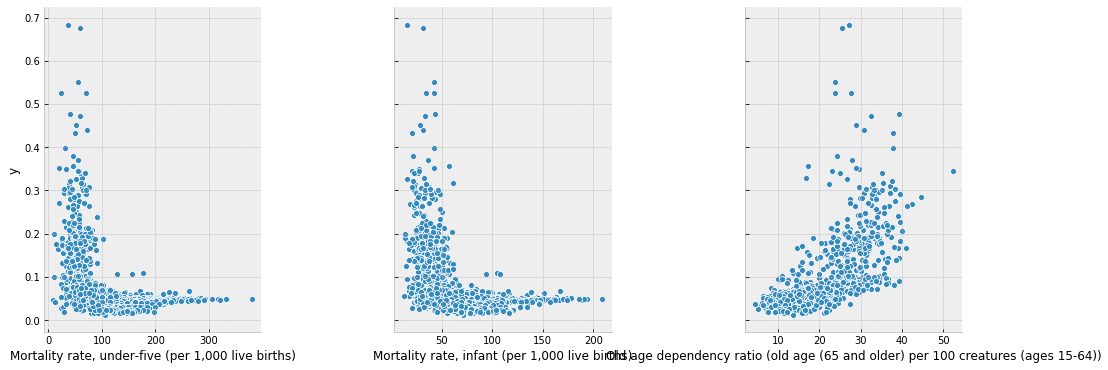

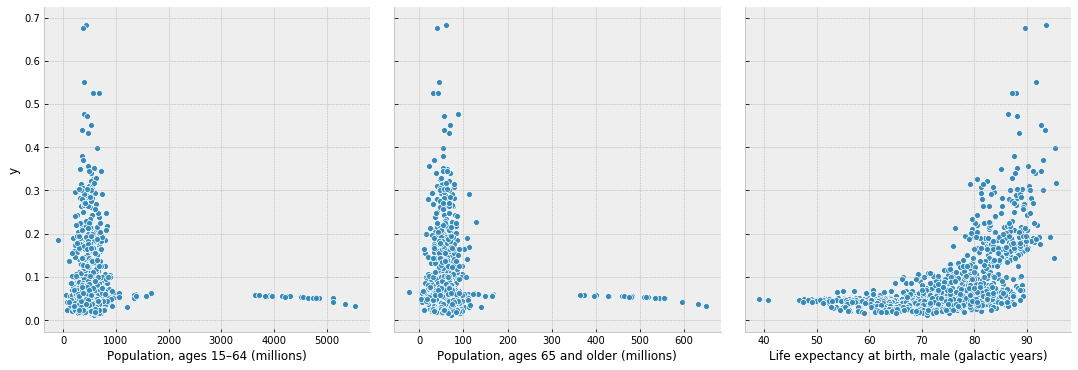

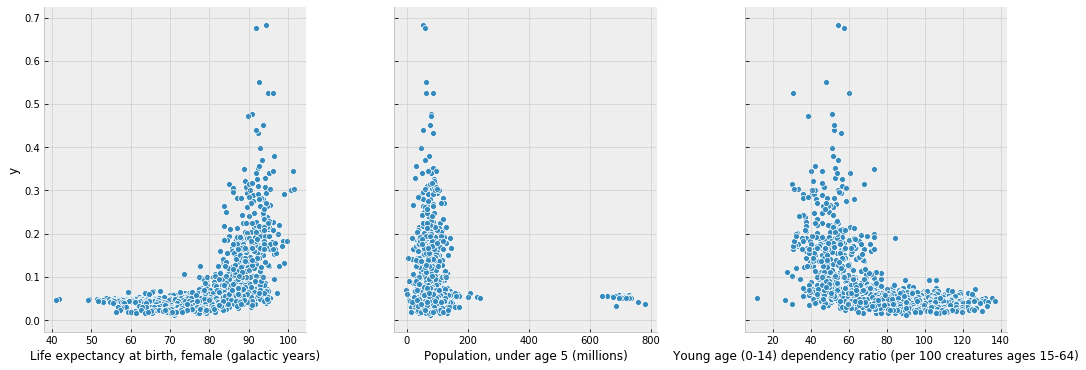

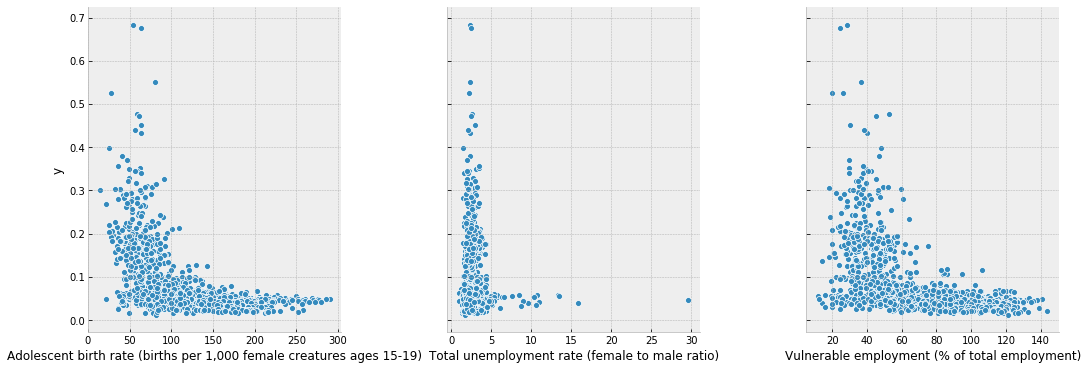

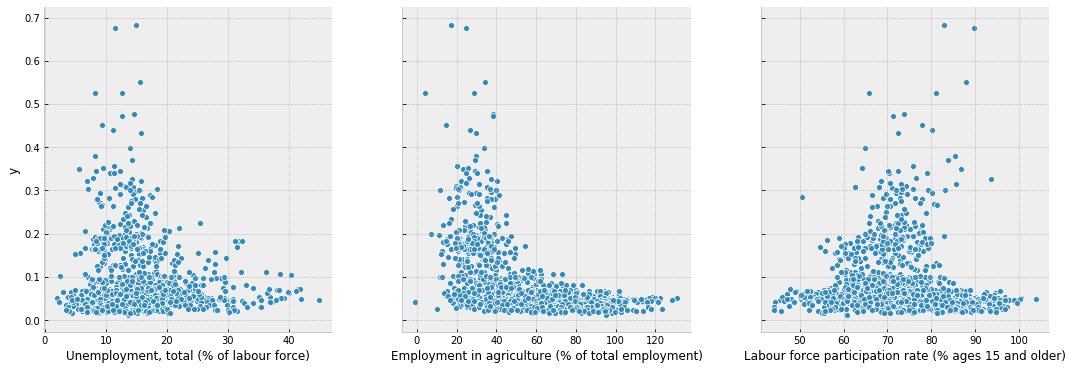

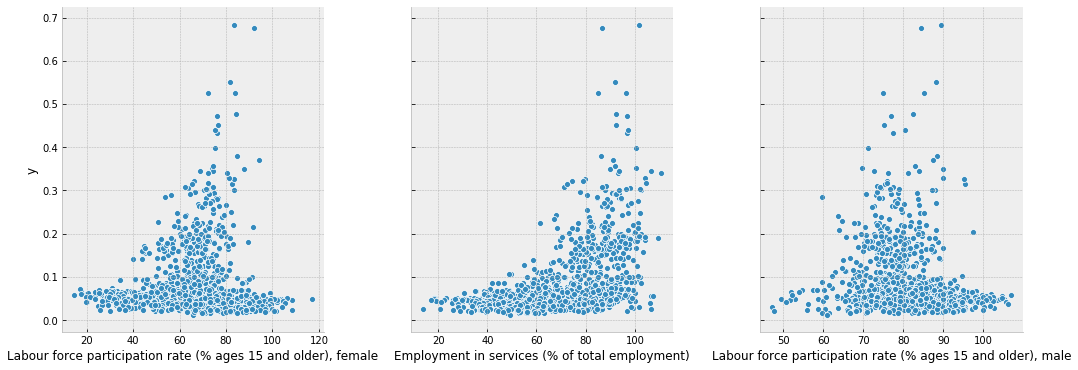

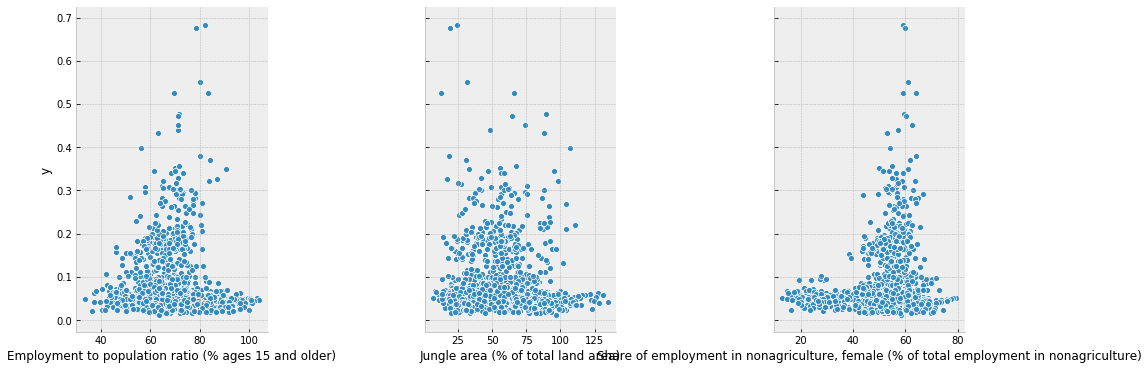

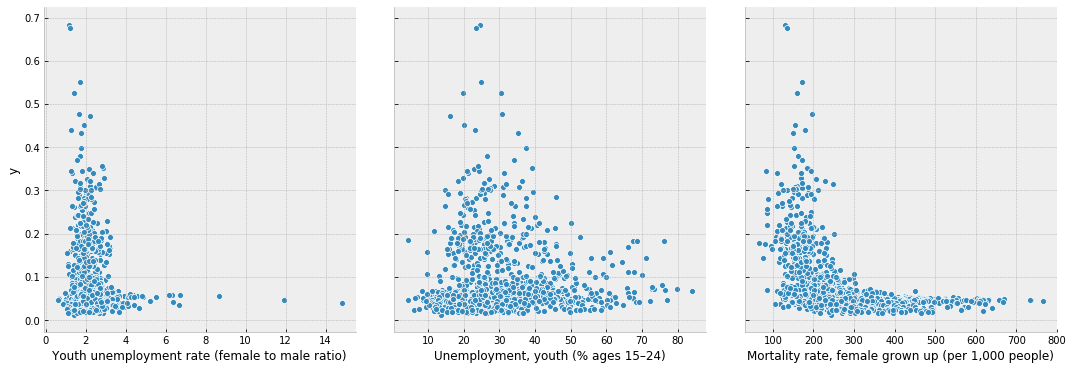

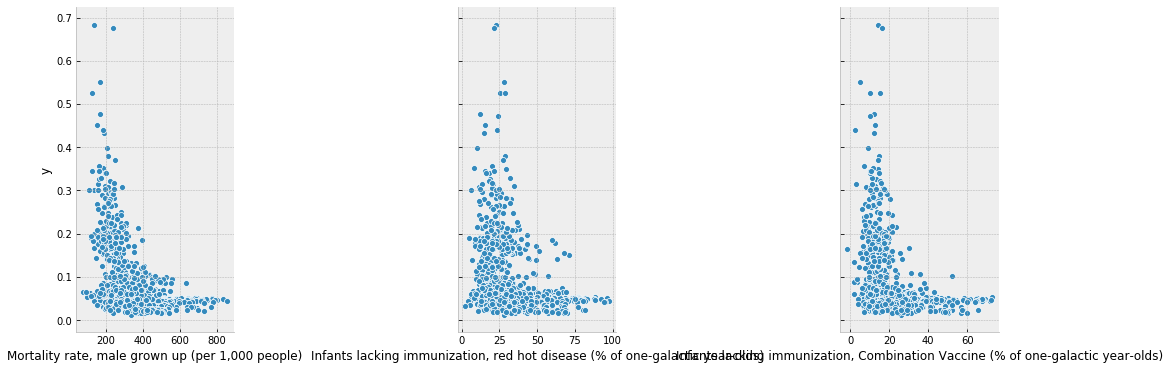

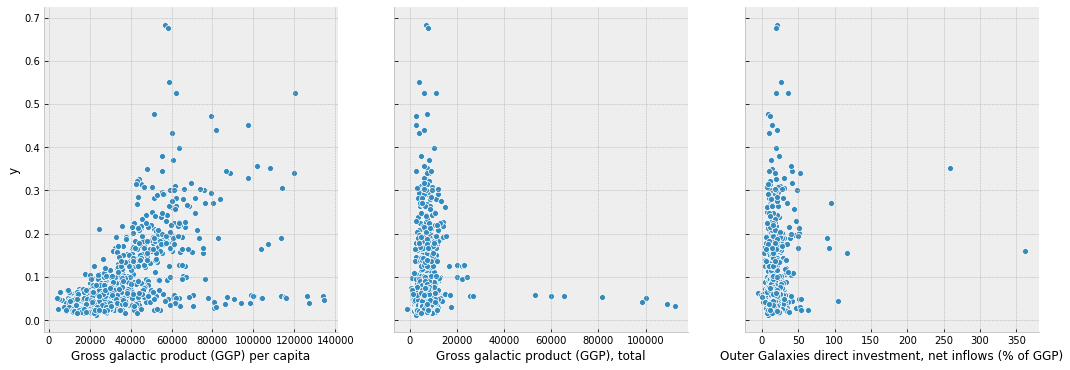

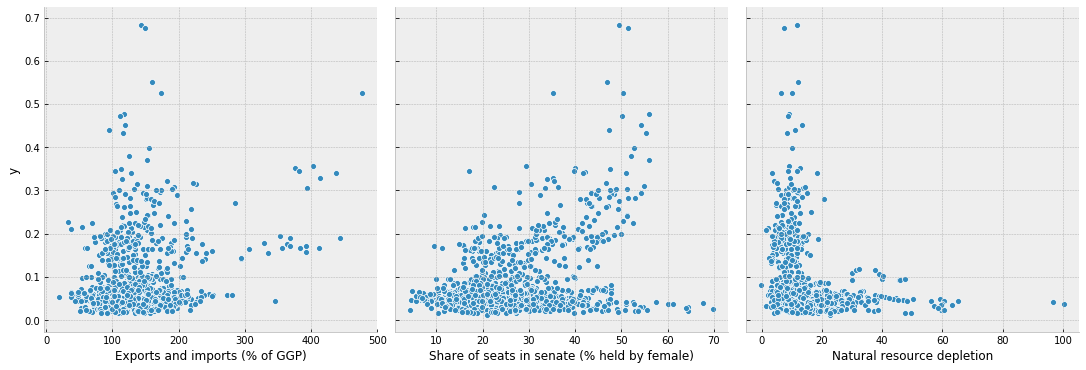

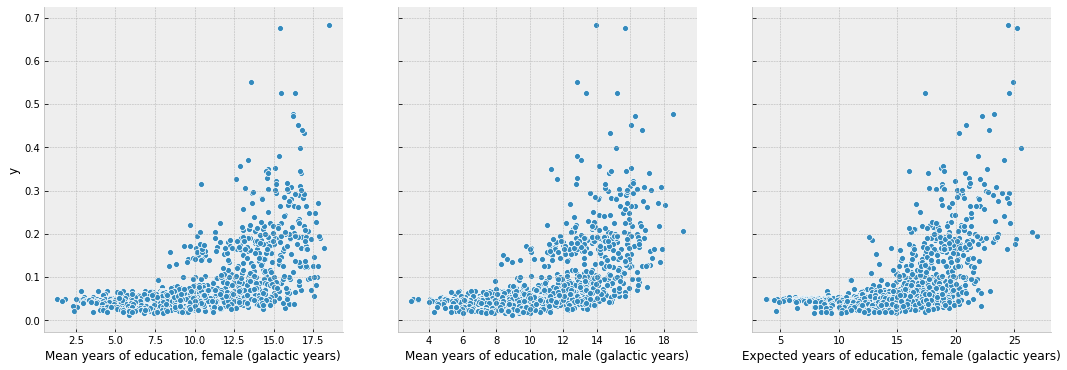

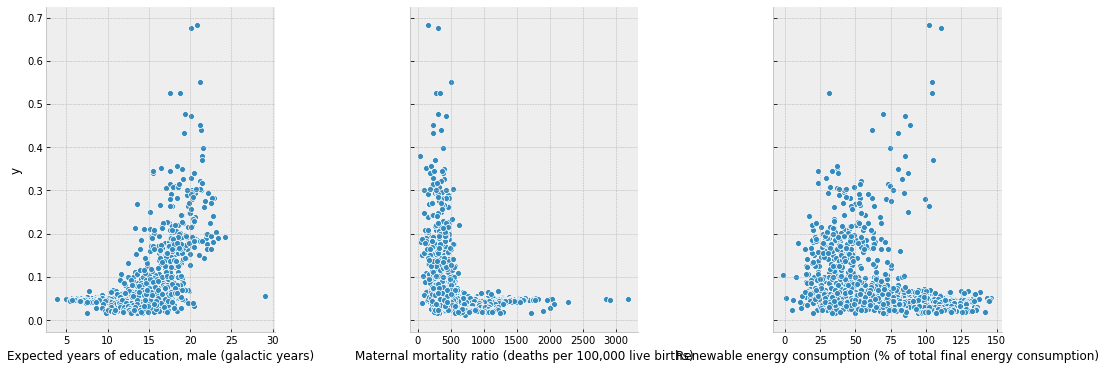

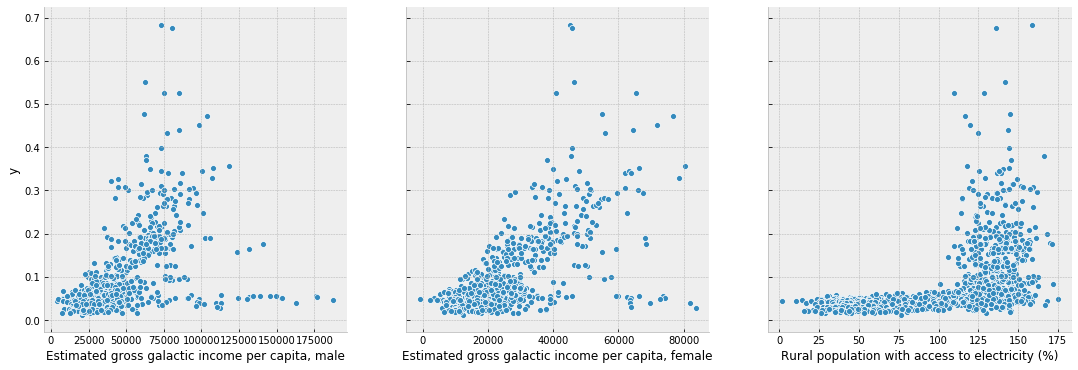

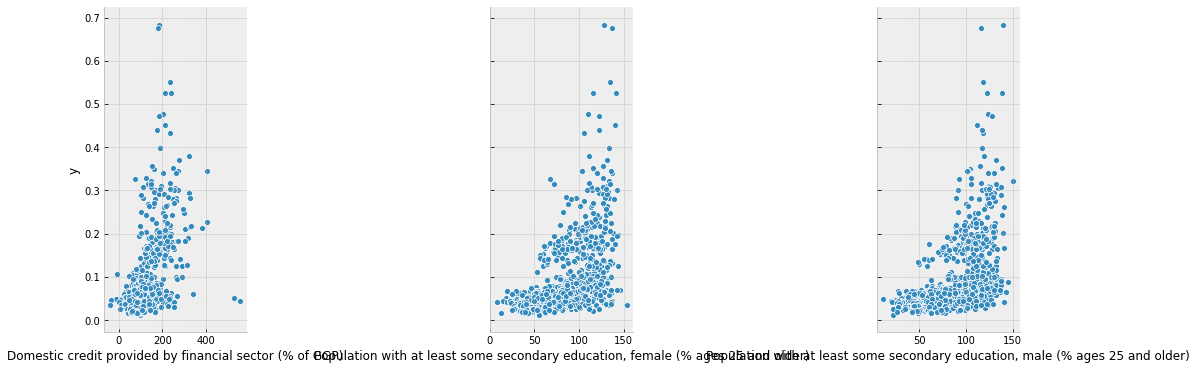

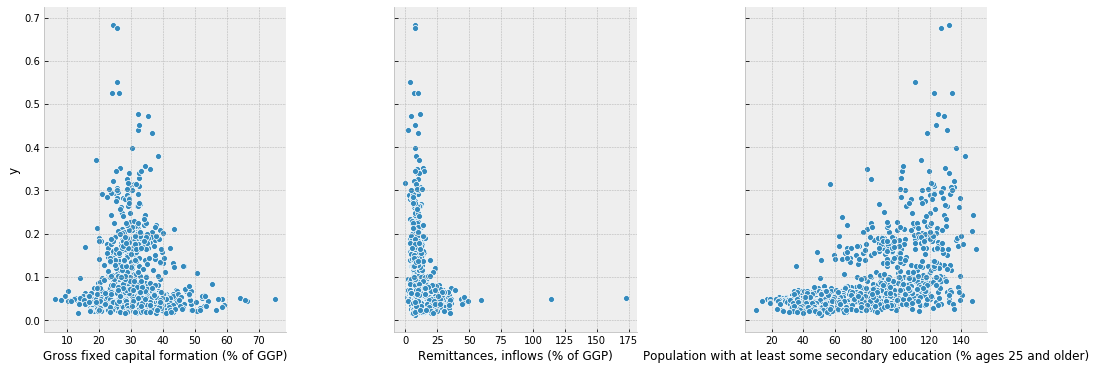

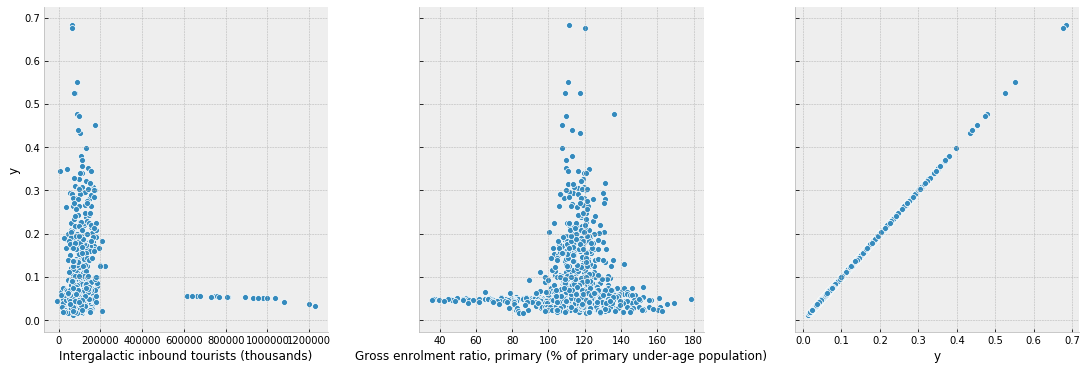

In [40]:
for i in range(0, len(df_num.columns), 3):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+3],
                y_vars=['y'], size=5)

Feature relationships with class label

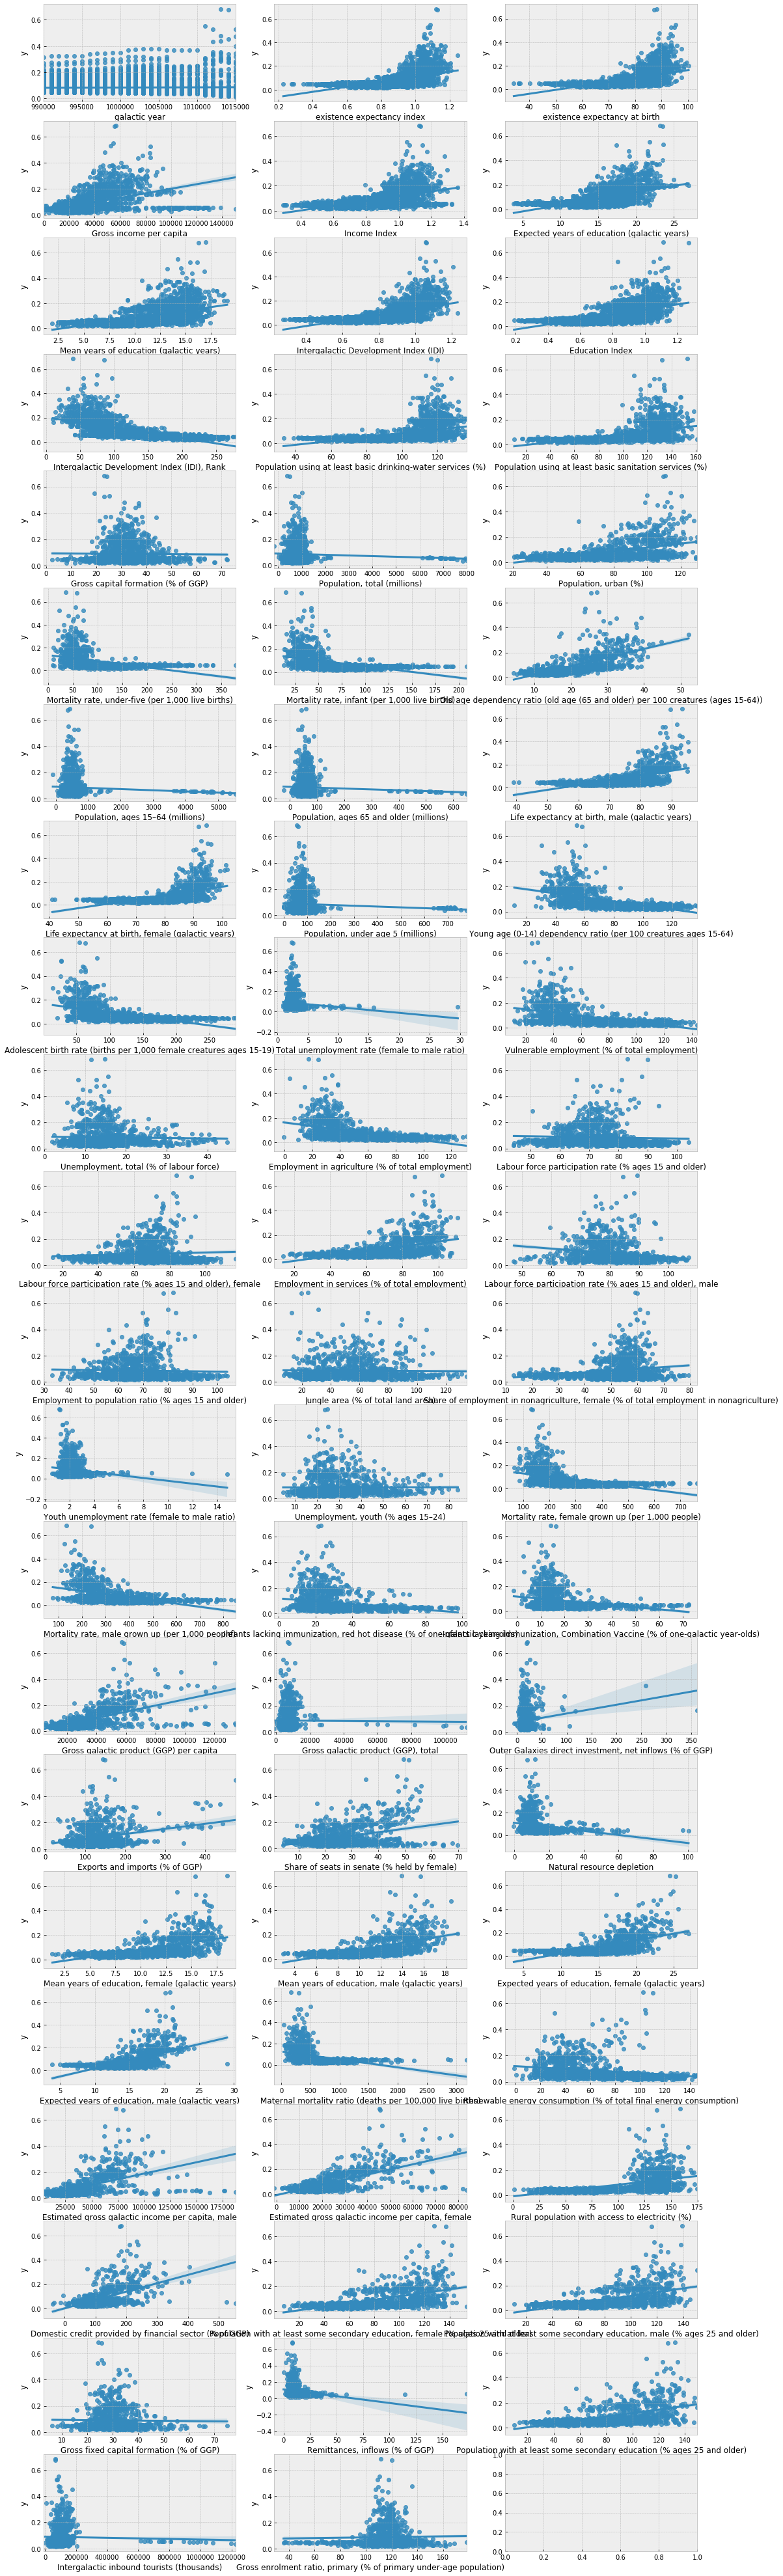

In [44]:
features_to_analyse = list(df_num)
fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 3, figsize = (18, 72))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x=features_to_analyse[i],y='y', data=df[features_to_analyse], ax=ax)

# Categorical Variables

In [45]:
# quantitative_features_list[:-1] as the last column is y and we want to keep it
df_cat = df.select_dtypes(include = ['O'])
df_cat['y'] = df['y']
categorical_features = list(df_cat)
df_cat.head()

c:\users\saif\anaconda3\envs\prohack\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


galaxy         y
0  Large Magellanic Cloud (LMC)  0.052590
1              Camelopardalis B  0.059868
2                       Virgo I  0.050449
3            UGC 8651 (DDO 181)  0.049394
4                  Tucana Dwarf  0.154247

Box Plots for categorical features agains class label

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

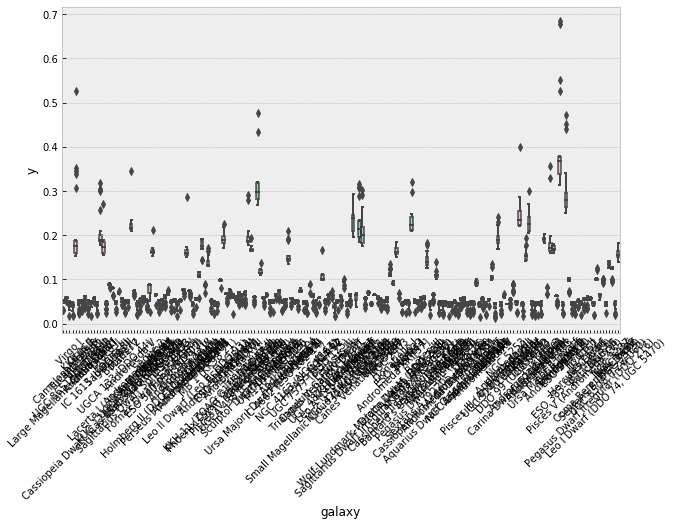

In [46]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='galaxy', y='y', data=df_cat)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

# High Dimentional Data Analysis
Most real-world datasets have more than one feature. Each of them can be considered as a dimension in the space of data points. Consequently, more often than not, we deal with high-dimensional datasets, where entire visualization is quite hard.

To visualize the dataset as a whole, we need to decrease the number of dimensions used in visualization without losing much information about data. This task is called dimensionality reduction and is an example of an unsupervised learning problem because we need to derive new, low-dimensional features from the data itself, without any supervised input.

One of the well-known dimensionality reduction methods is Principal Component Analysis (PCA), which is covered in the previous lectures. Its limitation is that it is a linear algorithm that implies certain restrictions on the data.

There are also many non-linear methods, collectively called Manifold Learning. One of the best-known of them is [t-SNE](https://medium.com/@luckylwk/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b)

#  t-distributed Stohastic Neighbor Embedding (t-SNE)
Basic idea is to find a projection for a high-dimensional feature space onto a plane (or a 3D hyperplane, but it is almost always 2D) such that those points that were far apart in the initial n-dimensional space will end up far apart on the plane. Those that were originally close would remain close to each other.
Please refer to the 
[t-SNE](http://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf)



In [51]:
#scaling the dataset 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_num.fillna(0))

#tsne modeling
tsne = TSNE(n_components=2)
tsne_repr = tsne.fit_transform(X_scaled)

In [52]:
# converting into dataframe
tsne_repr = pd.DataFrame(tsne_repr, columns=['dim'+str(i) for i in range(1,3)])

# converting continous variable to class labels using binning
df['y']=pd.cut(np.array(df['y']),2,labels=["low_well_being", "high_well_being"])

label_encoder=LabelEncoder()
df['y']=label_encoder.fit_transform(df['y'])

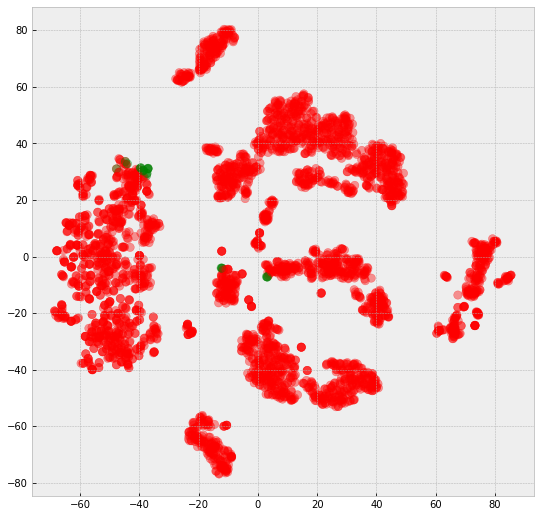

In [53]:
#ploting it w.r.t to class variable i.e. assigning each class label colour
plt.figure(figsize=(9, 9))
plt.scatter(np.array(tsne_repr['dim1']), np.array(tsne_repr['dim2']),alpha=0.4,s=70,c=df['y'].map({0: 'green', 1: 'red'}))

# Pandas profiling https://github.com/pandas-profiling/pandas-profiling

For each column the following statistics - if relevant for the column type - are presented in an interactive HTML report:

- Essentials: type, unique values, missing values
- Quantile statistics like minimum value, Q1, median, Q3, maximum, range, interquartile range
- Descriptive statistics like mean, mode, standard deviation, sum, median absolute deviation, coefficient of variation, kurtosis, skewness
- Most frequent values
- Histogram
- Correlations highlighting of highly correlated variables, Spearman and Pearson matrixes

In [58]:
# import pandas_profiling
# pandas_profiling.ProfileReport(df)

# Thanks Folk !